##Задание 1. Загрузка данных

In [551]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [552]:
column_names = ['surgery?', 'Age', 'rectal temperature', 'pulse',
                'respiratory rate', 'temperature of extremities', 'pain', 'outcome']
column_use = [0, 1, 3, 4, 5, 6, 10, 22]

df_horse = pd.read_csv('horse_data.csv', names=column_names, header=None,
                       usecols = column_use)
df_horse.head(5)

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2,1,38.50,66,28,3,5,2
1,1,1,39.2,88,20,?,3,3
2,2,1,38.30,40,24,1,3,1
3,1,9,39.10,164,84,4,2,2
4,2,1,37.30,104,35,?,?,2


##Задание 2.1. Первичное изучение данных

Для каждого столбца найдем уникальные значения. И сопоставим их с вариантами значений в описании к набору данных.

In [553]:
df_horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   surgery?                    300 non-null    object
 1   Age                         300 non-null    int64 
 2   rectal temperature          300 non-null    object
 3   pulse                       300 non-null    object
 4   respiratory rate            300 non-null    object
 5   temperature of extremities  300 non-null    object
 6   pain                        300 non-null    object
 7   outcome                     300 non-null    object
dtypes: int64(1), object(7)
memory usage: 18.9+ KB


In [554]:
df_horse['surgery?'].value_counts()

1    180
2    119
?      1
Name: surgery?, dtype: int64

In [555]:
df_horse['Age'].value_counts()

1    276
9     24
Name: Age, dtype: int64

In [556]:
df_horse['rectal temperature'].value_counts()

?        60
38.00    16
37.80    13
38.30    12
38.50    10
         ..
36.40     1
39.7      1
35.4      1
39.90     1
37.2      1
Name: rectal temperature, Length: 66, dtype: int64

In [557]:
df_horse['pulse'].value_counts()

48     28
60     25
?      24
40     18
88     12
52     12
100    11
44     11
72     11
42     10
120    10
64      8
80      8
84      8
96      8
54      7
56      7
50      6
66      6
68      5
104     5
76      4
92      4
70      4
36      3
108     3
112     3
86      3
90      3
78      3
45      2
30      2
124     2
140     2
114     2
150     2
130     2
98      1
129     1
75      1
184     1
164     1
128     1
110     1
65      1
146     1
38      1
132     1
136     1
49      1
46      1
160     1
82      1
Name: pulse, dtype: int64

In [558]:
df_horse['respiratory rate'].value_counts()

?     58
20    28
24    27
16    22
30    19
12    19
40    17
36    16
28    13
32    11
18     8
48     6
60     4
14     4
44     3
68     3
80     3
35     3
10     3
42     3
50     2
22     2
96     2
84     2
21     2
51     2
9      2
90     2
70     2
58     1
25     1
88     1
26     1
13     1
15     1
23     1
8      1
72     1
66     1
52     1
34     1
Name: respiratory rate, dtype: int64

In [559]:
df_horse['temperature of extremities'].value_counts()

3    109
1     78
?     56
2     30
4     27
Name: temperature of extremities, dtype: int64

In [560]:
df_horse['pain'].value_counts()

3    67
2    59
?    55
5    42
4    39
1    38
Name: pain, dtype: int64

In [561]:
df_horse['outcome'].value_counts()

1    178
2     77
3     44
?      1
Name: outcome, dtype: int64

##Задание 2.2. Расчет базовые статистик

В результате анализа значений по столбцам найдены следующие выбросы:
- в столбце 'surgery?' - 1 строка со значением '?'
- в столбце 'Age' - 24 строки со значением '9'
- в столбце 'rectal temperature' - 60 строк со значением '?'
- в столбце 'pulse' - 24 строки со значением '?'
- в столбце 'respiratory rate' - 58 строк со значением '?'
- в столбце 'temperature of extremities' - 56 строк со значением '?'
- в столбце 'pain' - 55 строк со значением '?'
- в столбце 'outcome' - 1 строка со значением '?'

На данном этапе расчет базовых статистик невозможен, так как из-за выбросов тип данных в столбцах нечисловой. Для расчета необходимо заменить эти значения на NaN, а затем изменить тип данных всех столбцов.

In [562]:
def replase_and_change_type(c_name, c_txt, c_type):
  df_horse[c_name] = df_horse[c_name].replace(c_txt, np.NaN)
  df_horse[c_name] = df_horse[c_name].astype(c_type)

In [563]:
columns_info = [['?', 'Int64'], [9, 'Int64'], ['?', 'float64'],
                ['?', 'Int64'], ['?', 'Int64'], ['?', 'Int64'], ['?', 'Int64'],
                ['?', 'Int64']]
columns = dict(zip(list(df_horse.columns), columns_info))

for name, info in columns.items():
  replase_and_change_type(name, info[0], info[1])

df_horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    299 non-null    Int64  
 1   Age                         276 non-null    Int64  
 2   rectal temperature          240 non-null    float64
 3   pulse                       276 non-null    Int64  
 4   respiratory rate            242 non-null    Int64  
 5   temperature of extremities  244 non-null    Int64  
 6   pain                        245 non-null    Int64  
 7   outcome                     299 non-null    Int64  
dtypes: Int64(7), float64(1)
memory usage: 20.9 KB


In [564]:
df_horse.describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,299.0,276.0,240.000000,276.0,242.0,244.0,245.0,299.0
mean,1.397993,1.0,38.167917,71.913043,30.417355,2.348361,2.95102,1.551839
std,0.490305,0.0,0.732289,28.630557,17.642231,1.045054,1.30794,0.737187
min,1.0,1.0,35.400000,30.0,8.0,1.0,1.0,1.0
25%,1.0,1.0,37.800000,48.0,18.5,1.0,2.0,1.0
50%,1.0,1.0,38.200000,64.0,24.5,3.0,3.0,1.0
75%,2.0,1.0,38.500000,88.0,36.0,3.0,4.0,2.0
max,2.0,1.0,40.800000,184.0,96.0,4.0,5.0,3.0


##Задание 2.2. Поиск выбросов

Для категориальных типов данных выбросами будут пустые значения (на которые были заменены выше значения "?" и "9").

Для количественных типов данных для поиска можно использовать межквартильный размах.

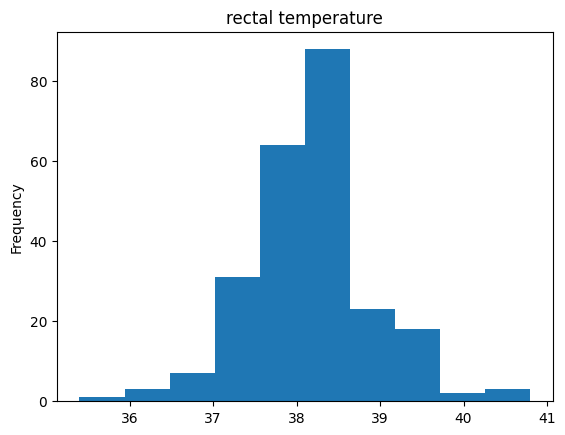

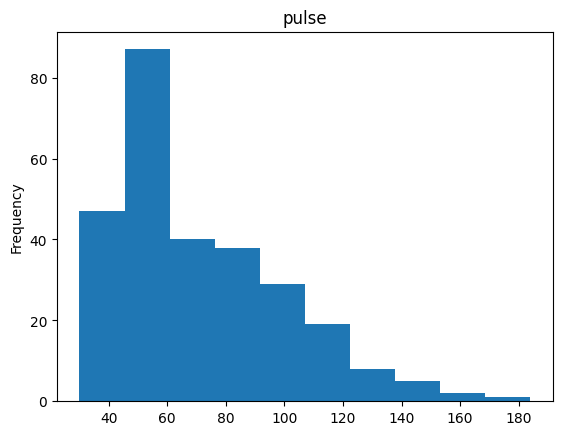

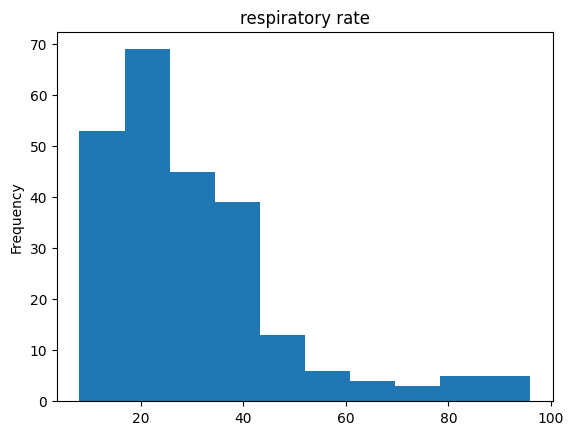

In [565]:
# построение гистограмм для количественных типов данных

df_horse['rectal temperature'].plot(kind='hist', title='rectal temperature')
plt.show()
df_horse['pulse'].plot(kind='hist', title='pulse')
plt.show()
df_horse['respiratory rate'].plot(kind='hist', title='respiratory rate')
plt.show()

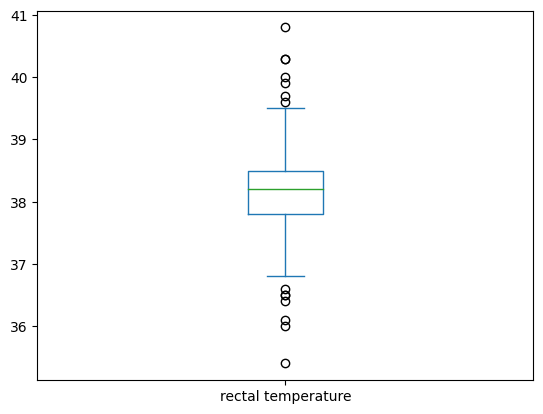

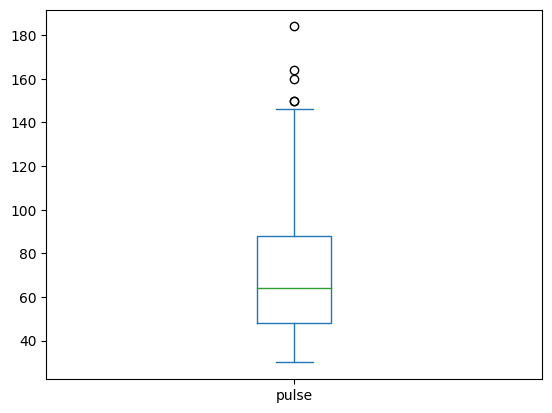

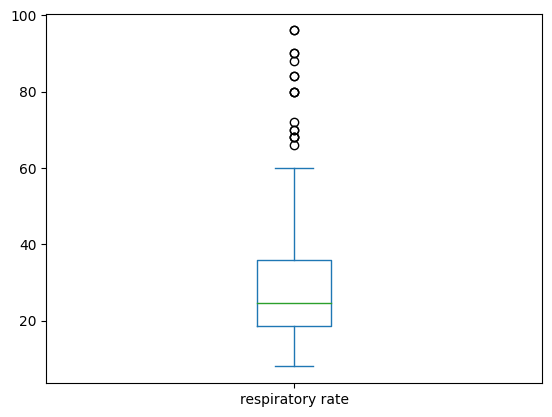

In [566]:
# построение боксплотов для количественных типов данных

df_horse['rectal temperature'].plot(kind='box')
plt.show()
df_horse['pulse'].plot(kind='box')
plt.show()
df_horse['respiratory rate'].plot(kind='box')
plt.show()

In [567]:
def outliers_search(col_name, normal=True):
  q1 = df_horse[col_name].quantile(0.25)
  q3 = df_horse[col_name].quantile(0.75)
  iqr = q3 - q1
  upper = q3 + (1.5 * iqr)

  if normal:
    lower = q1 - (1.5 * iqr)
  else:
    lower = 0 # какая именно граница определено по боксплотам

  return df_horse[~df_horse[col_name].between(lower, upper, inclusive='both')]

In [568]:
outliers_search('rectal temperature', normal=True)

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
5,2,1,NaN,<NA>,<NA>,2,2,1
7,1,1,NaN,60,<NA>,3,<NA>,2
8,2,1,NaN,80,36,3,4,3
16,1,<NA>,NaN,128,36,3,4,2
20,1,1,39.9,72,60,1,5,1
...,...,...,...,...,...,...,...,...
282,1,1,NaN,70,16,3,2,2
288,1,1,NaN,<NA>,<NA>,<NA>,<NA>,1
293,1,1,NaN,78,24,3,<NA>,3
295,1,1,NaN,120,70,4,2,3


In [569]:
outliers_search('pulse', normal=False)

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
3,1,<NA>,39.1,164,84,4,2,2
41,2,<NA>,39.0,150,72,<NA>,<NA>,1
55,1,<NA>,38.6,160,20,3,3,2
255,1,<NA>,38.8,184,84,1,4,2
275,1,<NA>,38.8,150,50,1,5,2


In [570]:
outliers_search('respiratory rate', normal=False)

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
3,1,<NA>,39.1,164,84,4,2,2
39,1,<NA>,39.2,146,96,<NA>,<NA>,2
41,2,<NA>,39.0,150,72,<NA>,<NA>,1
82,1,<NA>,38.1,100,80,3,3,1
84,1,1,37.8,60,80,1,2,1
103,1,<NA>,38.0,140,68,1,3,1
106,1,1,38.3,52,96,<NA>,<NA>,1
120,1,1,39.4,54,66,1,2,1
125,1,1,38.0,42,68,4,3,1
186,1,1,39.3,64,90,2,<NA>,1


##Задание 3. Работа с пропусками

Для корректного заполнения пропусков в некоторых столбцах можно воспользоваться полной версией датафрейма:

In [571]:
df = pd.read_csv('horse_data.csv', header=None, na_values=['?', '9'])

### Пропуски в столбце 'surgery?'

In [572]:
df[df[0].isna()]

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
132,NaN,1.0,534572,38.0,48.0,20.0,3.0,1.0,3.0,1.0,...,43.0,73.0,2.0,1.0,NaN,1,3111,0,0,2


Для данного случая указано следующее:
- растяжение толстой кишки (значение 5 в столбце столбце abdomen)
- хирургическое поражение (значение 1 в столбце surgical lesion?)
- периодическая сильная боль (значение 4 в столбце pain)

Исходя из этого, в столбце surgery? для данной строки можно указать значение 1 (проведена операция)

In [573]:
df_horse.loc[df_horse['surgery?'].isna(), 'surgery?'] = 1

###Пропуски в столбце 'Age'

In [574]:
df_horse[df_horse['Age'].isna()].head()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
3,1,<NA>,39.1,164,84,4,2,2
9,2,<NA>,38.3,90,<NA>,1,5,1
13,2,<NA>,38.0,92,28,1,1,2
16,1,<NA>,NaN,128,36,3,4,2
23,1,<NA>,38.3,130,60,<NA>,2,1


In [575]:
df_horse[df_horse['Age'].isna()].describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,24.0,0.0,20.000000,22.0,20.0,16.0,17.0,24.0
mean,1.25,<NA>,38.645000,123.363636,54.6,2.125,3.117647,1.541667
std,0.442326,<NA>,0.490408,28.628234,23.904195,1.087811,1.218726,0.58823
min,1.0,<NA>,38.000000,84.0,20.0,1.0,1.0,1.0
25%,1.0,<NA>,38.275000,100.0,34.5,1.0,2.0,1.0
50%,1.0,<NA>,38.600000,124.0,49.0,2.5,3.0,1.5
75%,1.25,<NA>,38.925000,144.5,74.0,3.0,4.0,2.0
max,2.0,<NA>,39.700000,184.0,96.0,4.0,5.0,3.0


В данном случае пропуски в столбце Age можно заполнить исходя из значений в столбце pulse.

Высокий пульс характерен для молодых лошадей. Средний пульс для строк с пропусками в столбце Age гораздо больше среднего пульса по всей таблице.

Исходя из этого, в столбце Age для данных строк можно указать значения 2 (молодая, < 6 месяцев).

In [576]:
df_horse.loc[df_horse['Age'].isna(), 'Age'] = 2

###Пропуски в столбце 'rectal temperature'

In [577]:
df_horse[df_horse['rectal temperature'].isna()].head()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
5,2,1,NaN,<NA>,<NA>,2,2,1
7,1,1,NaN,60,<NA>,3,<NA>,2
8,2,1,NaN,80,36,3,4,3
16,1,2,NaN,128,36,3,4,2
28,1,1,NaN,<NA>,<NA>,<NA>,<NA>,2


Расчет корреляции для всех столбцов

In [578]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.000000,NaN,-0.126044,0.040680,-0.186886,-0.201550,-0.116474,-0.238054,-0.187696,-0.087426,...,-0.042034,-0.046661,-0.212591,0.035133,-0.117619,0.605023,-0.163940,-0.098594,-0.047101,0.005827
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.126044,NaN,1.000000,0.144421,0.380078,0.272065,-0.061167,0.009016,-0.031190,0.044994,...,-0.093058,-0.230738,-0.160109,-0.040981,-0.004377,-0.101393,0.145486,-0.050253,-0.020875,-0.097457
3,0.040680,NaN,0.144421,1.000000,0.219260,0.264180,0.096526,0.093774,0.051794,0.139324,...,0.065373,-0.060445,-0.078268,0.011270,-0.057082,0.019553,0.062703,-0.062728,0.029395,-0.066317
4,-0.186886,NaN,0.380078,0.219260,1.000000,0.464534,0.335041,0.533369,0.483060,0.398481,...,0.406090,-0.089728,0.362049,0.031446,0.313215,-0.266335,0.079511,-0.001455,0.101466,-0.119113
5,-0.201550,NaN,0.272065,0.264180,0.464534,1.000000,0.103111,0.232102,0.121640,0.098338,...,0.074167,-0.102971,0.142859,-0.065342,0.056084,-0.227530,0.225141,-0.021916,0.145071,0.071125
6,-0.116474,NaN,-0.061167,0.096526,0.335041,0.103111,1.000000,0.549754,0.353447,0.281670,...,0.360419,0.013485,0.456847,-0.005891,0.355442,-0.214631,-0.020405,-0.025850,NaN,0.043524
7,-0.238054,NaN,0.009016,0.093774,0.533369,0.232102,0.549754,1.000000,0.498467,0.443074,...,0.511055,-0.038050,0.457836,0.004085,0.410632,-0.341346,0.104811,0.049548,NaN,0.012467
8,-0.187696,NaN,-0.031190,0.051794,0.483060,0.121640,0.353447,0.498467,1.000000,0.491490,...,0.633309,-0.082083,0.401830,-0.086141,0.399916,-0.251656,-0.074213,-0.039635,NaN,-0.071741
9,-0.087426,NaN,0.044994,0.139324,0.398481,0.098338,0.281670,0.443074,0.491490,1.000000,...,0.489188,-0.103800,0.388782,0.110010,0.318901,-0.171495,0.032831,0.003473,NaN,-0.025400


Базовые статистики для непустых значений в столбце rectal temperature

In [579]:
df_horse[~df_horse['rectal temperature'].isna()].describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,240.0,240.0,240.000000,234.0,210.0,198.0,200.0,239.0
mean,1.4125,1.083333,38.167917,70.235043,30.428571,2.242424,2.765,1.506276
std,0.493313,0.276963,0.732289,28.935037,18.168461,1.057638,1.235885,0.732615
min,1.0,1.0,35.400000,30.0,8.0,1.0,1.0,1.0
25%,1.0,1.0,37.800000,48.0,18.0,1.0,2.0,1.0
50%,1.0,1.0,38.200000,60.0,24.0,3.0,3.0,1.0
75%,2.0,1.0,38.500000,88.0,36.0,3.0,4.0,2.0
max,2.0,2.0,40.800000,184.0,96.0,4.0,5.0,3.0


Базовые статистики для пустых значений в столбце rectal temperature

In [580]:
df_horse[df_horse['rectal temperature'].isna()].describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,60.0,60.0,0.0,42.0,32.0,46.0,45.0,60.0
mean,1.333333,1.066667,NaN,81.261905,30.34375,2.804348,3.777778,1.733333
std,0.475383,0.251549,NaN,25.189099,13.936745,0.859446,1.312335,0.733385
min,1.0,1.0,NaN,36.0,12.0,1.0,1.0,1.0
25%,1.0,1.0,NaN,60.0,20.0,3.0,3.0,1.0
50%,1.0,1.0,NaN,80.0,30.0,3.0,4.0,2.0
75%,2.0,1.0,NaN,100.0,36.0,3.0,5.0,2.0
max,2.0,2.0,NaN,128.0,70.0,4.0,5.0,3.0


В данном случае не удалось выявить закономерности, которые позволили бы заполнить пропуски точными значениями. А в описании к параметру rectal temperature указано, что он обычно меняется по мере развития проблемы. К тому же средние показатели по всей таблице не особо отличаются от средних показателей строк с пустым значением rectal temperature.

Расчет корреляции для всех столбцов показал, что линейная зависимость между столбцом rectal temperature (3) и остальными столбцами почти отсутствует.

Поэтому решено заполнить пустые значения в столбце rectal temperature медианой.

In [581]:
df_horse['rectal temperature'] = df_horse['rectal temperature'].fillna(df_horse['rectal temperature'].median())

###Пропуски в столбце 'pulse'

In [582]:
df_horse[df_horse['pulse'].isna()]

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
5,2,1,38.2,<NA>,<NA>,2,2,1
28,1,1,38.2,<NA>,<NA>,<NA>,<NA>,2
52,2,1,38.2,<NA>,<NA>,1,1,1
56,1,1,38.2,<NA>,<NA>,<NA>,<NA>,1
58,1,1,38.2,<NA>,20,4,5,2
74,1,2,38.2,<NA>,<NA>,<NA>,<NA>,2
78,1,1,38.2,<NA>,<NA>,3,5,2
83,1,1,38.0,<NA>,24,3,5,2
93,2,1,38.2,<NA>,<NA>,3,5,2
115,2,1,38.2,<NA>,40,3,3,1


Согласно таблице корреляции, построенной по всем столбцам, пульс имеет умеренную линейную зависимость со следующими столбцами:

- respiratory rate (частота дыхания)
- peripheral pulse (периферический пульс)
- mucous membranes (слизистые оболочки )
- capillary refill time (время наполнения капилляров)
- packed cell volume (объем гематокрита)
- abdominocentesis appearance (внешний вид абдоминоцентеза)

Но почти у половины строк значения в данных стобцах не заполнены (как при указанном значении в столбце 'pulse', так и при неуказанном значении). В таком случае найти зависимость от этих параметров невозможно, а пустые значения в столбце 'pulse' можно заполнить медианой.


In [583]:
df_horse['pulse'] = df_horse['pulse'].fillna(df_horse['pulse'].median())

###Пропуски в столбце 'respiratory rate'

In [584]:
df_horse[df_horse['respiratory rate'].isna()]

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
5,2,1,38.2,64,<NA>,2,2,1
7,1,1,38.2,60,<NA>,3,<NA>,2
9,2,2,38.3,90,<NA>,1,5,1
28,1,1,38.2,64,<NA>,<NA>,<NA>,2
29,2,1,37.7,48,<NA>,2,1,1
32,1,1,37.2,60,<NA>,2,3,1
37,1,1,37.8,72,<NA>,<NA>,5,1
38,2,1,38.6,52,<NA>,1,3,1
40,1,1,38.2,88,<NA>,3,5,2
43,1,1,38.2,120,<NA>,3,4,3


Согласно таблице корреляции, построенной по всем столбцам, частота дыхания  имеет умеренную линейную зависимость со столбцом 'pulse' (пульс). При этом для 24 строк из 58 (в которых не указано значение в столбце 'respiratory rate') не было заполнено значение в столбце 'pulse', будем учитывать заполненные выше значения в столбце 'pulse' при расчете.

Можно поделить пульс на 2 категории:
- больше (либо равно) медианы
- меньше медианы

И заполнить пустые значения в столбце 'respiratory rate' медианой для каждой из категорий.

In [585]:
# значение частоты дыхания, когда пульс больше либо равен медиане

higher_median = df_horse.loc[((~df_horse['respiratory rate'].isna()) &
        (df_horse['pulse'] >= df_horse['pulse'].median())
        )]['respiratory rate'].median()

df_horse.loc[(df_horse['respiratory rate'].isna()) &
             (df_horse['pulse'] >= df_horse['pulse'].median()),
             'respiratory rate'] = higher_median

# значение частоты дыхания, когда пульс меньше медианы

lower_median = df_horse.loc[((~df_horse['respiratory rate'].isna()) &
        (df_horse['pulse'] < df_horse['pulse'].median())
        )]['respiratory rate'].median()

df_horse.loc[(df_horse['respiratory rate'].isna()) &
             (df_horse['pulse'] < df_horse['pulse'].median()),
             'respiratory rate'] = lower_median

###Пропуски в столбце 'temperature of extremities'

In [586]:
df_horse[df_horse['temperature of extremities'].isna()]

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
1,1,1,39.2,88,20,<NA>,3,3
4,2,1,37.3,104,35,<NA>,<NA>,2
17,2,1,37.5,48,24,<NA>,<NA>,1
23,1,2,38.3,130,60,<NA>,2,1
25,2,1,37.8,60,42,<NA>,<NA>,1
28,1,1,38.2,64,30,<NA>,<NA>,2
36,2,1,38.3,112,16,<NA>,<NA>,3
37,1,1,37.8,72,30,<NA>,5,1
39,1,2,39.2,146,96,<NA>,<NA>,2
41,2,2,39.0,150,72,<NA>,<NA>,1


Всего в параметре 'temperature of extremities' 4 категории, рассчитаем для каждого из них статистические показатели.

In [587]:
df_horse.loc[(df_horse['temperature of extremities'].isin([1]))].describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,78.0,78.0,78.000000,78.0,78.0,78.0,73.0,78.0
mean,1.448718,1.089744,38.132051,63.076923,27.153846,1.0,2.547945,1.24359
std,0.500582,0.287664,0.514338,26.589115,16.085064,0.0,1.202325,0.53902
min,1.0,1.0,36.500000,36.0,9.0,1.0,1.0,1.0
25%,1.0,1.0,37.800000,48.0,18.0,1.0,2.0,1.0
50%,1.0,1.0,38.200000,54.0,24.0,1.0,3.0,1.0
75%,2.0,1.0,38.400000,66.0,30.0,1.0,3.0,1.0
max,2.0,2.0,39.900000,184.0,88.0,1.0,5.0,3.0


In [588]:
df_horse.loc[(df_horse['temperature of extremities'].isin([2]))].describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,30.0,30.0,30.000000,30.0,30.0,30.0,28.0,30.0
mean,1.633333,1.033333,38.203333,60.366667,32.6,2.0,2.25,1.166667
std,0.490133,0.182574,0.576842,17.951051,19.377555,0.0,1.205696,0.461133
min,1.0,1.0,36.900000,40.0,12.0,2.0,1.0,1.0
25%,1.0,1.0,37.925000,48.0,20.0,2.0,1.0,1.0
50%,2.0,1.0,38.200000,56.0,30.0,2.0,2.0,1.0
75%,2.0,1.0,38.600000,67.0,39.0,2.0,3.0,1.0
max,2.0,2.0,39.300000,108.0,90.0,2.0,5.0,3.0


In [589]:
df_horse.loc[(df_horse['temperature of extremities'].isin([3]))].describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,109.0,109.0,109.000000,109.0,109.0,109.0,100.0,108.0
mean,1.385321,1.06422,38.190826,77.119266,29.192661,3.0,3.34,1.768519
std,0.488919,0.246277,0.788052,25.861714,12.939658,0.0,1.288802,0.756362
min,1.0,1.0,35.400000,36.0,9.0,3.0,1.0,1.0
25%,1.0,1.0,38.000000,60.0,20.0,3.0,2.0,1.0
50%,1.0,1.0,38.200000,76.0,30.0,3.0,3.0,2.0
75%,2.0,1.0,38.500000,96.0,36.0,3.0,5.0,2.0
max,2.0,2.0,40.800000,160.0,80.0,3.0,5.0,3.0


In [590]:
df_horse.loc[(df_horse['temperature of extremities'].isin([4]))].describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,27.0,27.0,27.000000,27.0,27.0,27.0,23.0,27.0
mean,1.259259,1.037037,38.388889,89.407407,36.111111,4.0,3.304348,1.851852
std,0.446576,0.19245,0.547254,30.371114,17.718598,0.0,1.25896,0.818239
min,1.0,1.0,37.500000,42.0,13.0,4.0,2.0,1.0
25%,1.0,1.0,38.200000,64.0,27.0,4.0,2.0,1.0
50%,1.0,1.0,38.200000,88.0,30.0,4.0,3.0,2.0
75%,1.5,1.0,38.600000,116.0,40.0,4.0,4.5,2.5
max,2.0,2.0,39.400000,164.0,84.0,4.0,5.0,3.0


Судя по статистическим данным показатель 'temperature of extremities' зависит от ректальной температуры (rectal temperature) и пульса (pulse).

В данном случае, чтобы не заполнять строки с пустым показателем 'temperature of extremities' одинаковыми значениями, можно разбить их на 4 категории (исходя из среднего значения ректальной температуры и пульса):
-  temperature of extremities = 1, когда pulse <= 71.9, respiratory rate <= 30.4
-  temperature of extremities = 2, когда pulse <= 71.9, respiratory rate > 30.4
-  temperature of extremities = 3, когда pulse > 71.9, respiratory rate <= 30.4
-  temperature of extremities = 4, когда pulse > 71.9, respiratory rate > 30.4



In [591]:
# temperature of extremities = 1

df_horse.loc[((df_horse['temperature of extremities'].isna()) &
              (df_horse['respiratory rate'] <= 30.4) & (df_horse['pulse'] <= 71.9)),
              'temperature of extremities'] = 1

In [592]:
# temperature of extremities = 2

df_horse.loc[((df_horse['temperature of extremities'].isna()) &
              (df_horse['respiratory rate'] > 30.4) & (df_horse['pulse'] <= 71.9)),
              'temperature of extremities'] = 2

In [593]:
# temperature of extremities = 3

df_horse.loc[((df_horse['temperature of extremities'].isna()) &
              (df_horse['respiratory rate'] <= 30.4) & (df_horse['pulse'] > 71.9)),
              'temperature of extremities'] = 3

In [594]:
# temperature of extremities = 4

df_horse.loc[((df_horse['temperature of extremities'].isna()) &
              (df_horse['respiratory rate'] > 30.4) & (df_horse['pulse'] > 71.9)),
              'temperature of extremities'] = 4

###Пропуски в столбце 'pain'

In [595]:
df_horse[df_horse['pain'].isna()]

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
4,2,1,37.3,104,35,4,<NA>,2
7,1,1,38.2,60,20,3,<NA>,2
17,2,1,37.5,48,24,1,<NA>,1
19,2,1,39.4,110,35,4,<NA>,1
24,1,1,38.1,60,12,3,<NA>,1
25,2,1,37.8,60,42,2,<NA>,1
27,1,1,37.8,48,12,3,<NA>,1
28,1,1,38.2,64,30,1,<NA>,2
36,2,1,38.3,112,16,3,<NA>,3
39,1,2,39.2,146,96,4,<NA>,2


Параметр 'pain' - субъективная оценка уровня боли у лошади. Как указано в описании, ее не следует рассматривать как упорядоченную или дискретную переменную. К тому же, она явно зависит от множества факторов.

Для начала можно учесть следующее правило: чем сильнее боль, тем больше вероятность того, что потребуется хирургическое вмешательство (т.е. surgery? = 1). Кроме того, согласно таблице корреляции, построенной для всех значений датафрейма, оценка боли имеет умеренную линейную зависимость со столбцом 'outcome' (результат).

В данном случае, чтобы не заполнять строки с пустым показателем 'pain' одинаковыми значениями, можно разбить их на 5 категорий:

In [596]:
# pain = 1 (операции не было, лошадь выжила)

df_horse[~(df_horse['pain'].isna()) & (df_horse['surgery?'] == 2) & (df_horse['outcome'] == 1)]['pain'].value_counts()

1    26
3    21
2    18
5     2
4     2
Name: pain, dtype: Int64

In [597]:
# pain = 2 (операция была, лошадь лошадь подверглась эвтаназии)

df_horse[~(df_horse['pain'].isna()) & (df_horse['surgery?'] == 1) & (df_horse['outcome'].isin([3]))]['pain'].value_counts()

2    8
5    6
4    5
3    1
Name: pain, dtype: Int64

In [598]:
# pain = 3 (операция была, лошадь выжила)

df_horse[~(df_horse['pain'].isna()) & (df_horse['surgery?'] == 1) & (df_horse['outcome'].isin([1]))]['pain'].value_counts()

3    33
2    15
5    10
1     9
4     8
Name: pain, dtype: Int64

In [599]:
# pain = 4 (операции не было, лошадь подверглась эвтаназии)

df_horse[~(df_horse['pain'].isna()) & (df_horse['surgery?'] == 2) & (df_horse['outcome'] == 3)]['pain'].value_counts()

4    6
2    4
3    4
1    1
Name: pain, dtype: Int64

In [600]:
# pain = 5 (операции не было, лошадь умерла)

df_horse[~(df_horse['pain'].isna()) & (df_horse['surgery?'] == 2) & (df_horse['outcome'] == 2)]['pain'].value_counts()

5    7
2    3
3    3
1    2
4    2
Name: pain, dtype: Int64

In [601]:
# pain = 5 (операция была, лошадь умерла)

df_horse[~(df_horse['pain'].isna()) & (df_horse['surgery?'] == 1) & (df_horse['outcome'].isin([2]))]['pain'].value_counts()

5    17
4    15
2    11
3     5
Name: pain, dtype: Int64

И заполнить 'pain' соответствующими значениями:

In [602]:
df_horse.loc[((df_horse['temperature of extremities'].isna()) &
              (df_horse['respiratory rate'] > 30.4) & (df_horse['pulse'] > 71.9)),
              'pain'] = 1

df_horse.loc[((df_horse['pain'].isna()) & (df_horse['surgery?'] == 2) &
              (df_horse['outcome'] == 1)), 'pain'] = 1

df_horse.loc[((df_horse['pain'].isna()) & (df_horse['surgery?'] == 1) &
              (df_horse['outcome'] == 3)), 'pain'] = 2

df_horse.loc[((df_horse['pain'].isna()) & (df_horse['surgery?'] == 1) &
              (df_horse['outcome'] == 1)), 'pain'] = 3

df_horse.loc[((df_horse['pain'].isna()) & (df_horse['surgery?'] == 2) &
              (df_horse['outcome'] == 3)), 'pain'] = 4

df_horse.loc[((df_horse['pain'].isna()) & (df_horse['surgery?'] == 2) &
              (df_horse['outcome'] == 2)), 'pain'] = 5

df_horse.loc[((df_horse['pain'].isna()) & (df_horse['surgery?'] == 1) &
              (df_horse['outcome'] == 2)), 'pain'] = 5

###Пропуски в столбце 'outcome'

In [603]:
df_horse[df_horse['outcome'].isna()]

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
132,1,1,38.0,48,20,3,4,<NA>


В данном случае не указано только 1 значение для столбца 'outcome'. Можно попробовать найти похожую строку в таблице и заполнить значением из этой строки.

In [604]:
df_horse.loc[(df_horse['surgery?'] == 1) & (df_horse['Age'] == 1) &
             (df_horse['rectal temperature'].between(37.5, 38.5)) &
             (df_horse['respiratory rate'].between(15, 25)) &
             (df_horse['temperature of extremities'] == 3) & (df_horse['pain'] == 4)]

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
132,1,1,38.0,48,20,3,4,<NA>
276,1,1,38.0,36,16,3,4,3


In [605]:
df_horse['outcome'] = df_horse['outcome'].fillna(3)

In [606]:
df_horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    300 non-null    Int64  
 1   Age                         300 non-null    Int64  
 2   rectal temperature          300 non-null    float64
 3   pulse                       300 non-null    Int64  
 4   respiratory rate            300 non-null    Int64  
 5   temperature of extremities  300 non-null    Int64  
 6   pain                        300 non-null    Int64  
 7   outcome                     300 non-null    Int64  
dtypes: Int64(7), float64(1)
memory usage: 20.9 KB
